# **START**

In [ ]:
# !pip install yfinance

In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
import plotly.graph_objects as go
from datetime import date
from plotly.validators.scatter.marker import SymbolValidator

In [71]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2022-01-01', end=date.today(), interval='1d')
BTC_USD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


**TIME SERIES CHART**

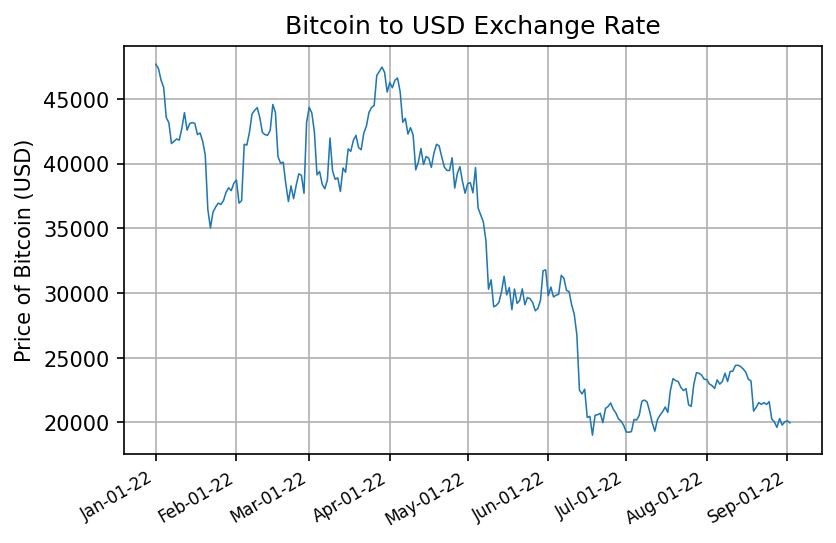

In [72]:
fig, ax = plt.subplots(dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

# **BASIC ANALYSIC**

In [87]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30,min_periods=1).mean()
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-08-29,19615.154297,20357.462891,19600.785156,20297.994141,20297.994141,32637854078,20852.623047,22561.486003
2022-08-30,20298.611328,20542.644531,19617.640625,19796.808594,19796.808594,34483360283,20659.588325,22443.483073
2022-08-31,19799.582031,20420.990234,19799.582031,20049.763672,20049.763672,33225232872,20509.683377,22334.668555
2022-09-01,20050.498047,20198.390625,19653.968750,20127.140625,20127.140625,30182031010,20354.022569,22239.636003
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928,20195.661675,22143.744792


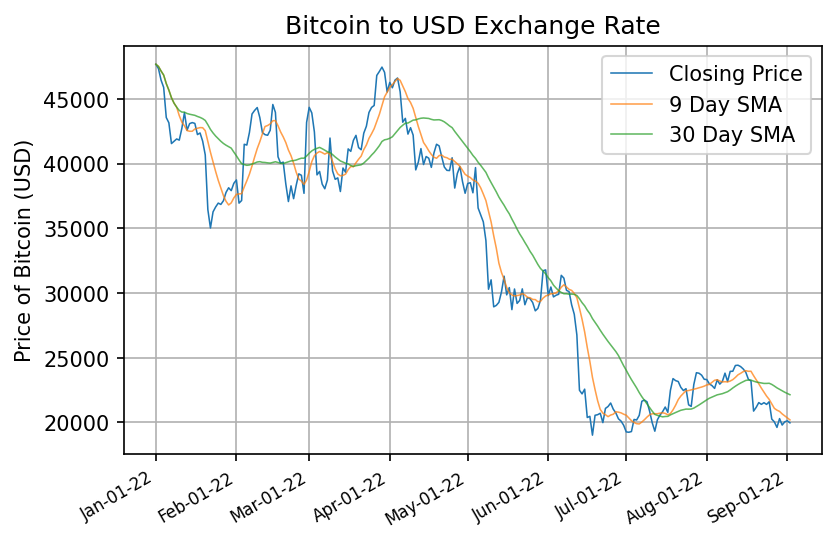

In [88]:
fig, ax = plt.subplots(dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
hiih
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [76]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [77]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

In [78]:
trade_signals['Position'] = trade_signals['Signal'].diff()

# TEST TRATEGY

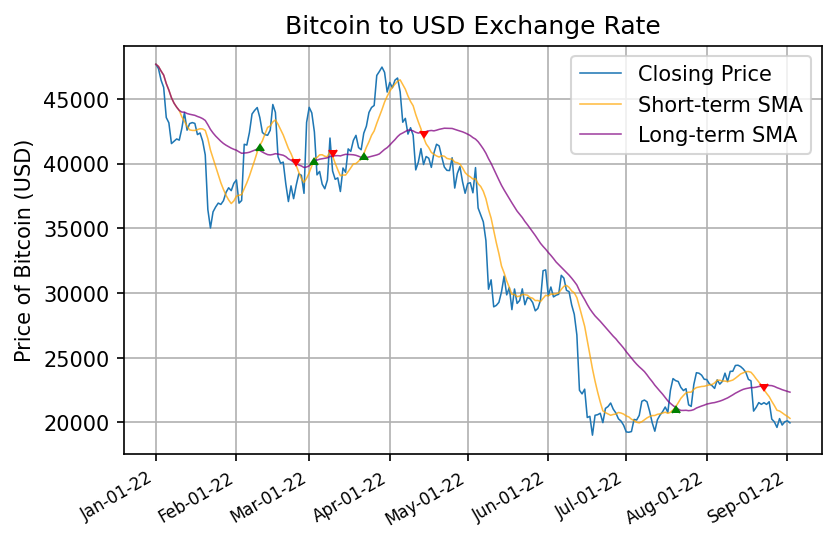

In [79]:
fig, ax = plt.subplots(dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=trade_signals.index, y=BTC_USD['Close'],
                    mode='lines',
                    name='Closing Price',
                    line=dict(color='royalblue')
                 ))
fig.add_trace(go.Scatter(x=trade_signals.index, y=trade_signals['Short'],
                    mode='lines',
                    name='Short-term SMA'
                 ))
fig.add_trace(go.Scatter(x=trade_signals.index, y=trade_signals['Long'],
                    mode='lines',
                    name='Long-term SMA',
                 ))

fig.add_trace(go.Scatter(mode="markers", x=trade_signals[trade_signals['Position']==1.0].index, y=trade_signals['Short'][trade_signals['Position']==1.0], marker_symbol=5,
                          marker_color="green",  marker=dict(size=10), name = 'upward trend'))

fig.add_trace(go.Scatter(mode="markers", x=trade_signals[trade_signals['Position']==-1.0].index, y=trade_signals['Short'][trade_signals['Position']==-1.0], marker_symbol=6,
                          marker_color="red",  marker=dict(size=10), name = 'downward trend'))

# Edit the layout
fig.update_layout(title='Bitcoin to USD Exchange Rate',
                   xaxis_title='Date',
                   yaxis_title='Price of Bitcoin (USD)')

fig.show()

# **BACKTEST THE TRATEGY**

In [84]:
# Define how much money you will start with (in USD)
initial_balance = 500 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price

In [85]:
# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

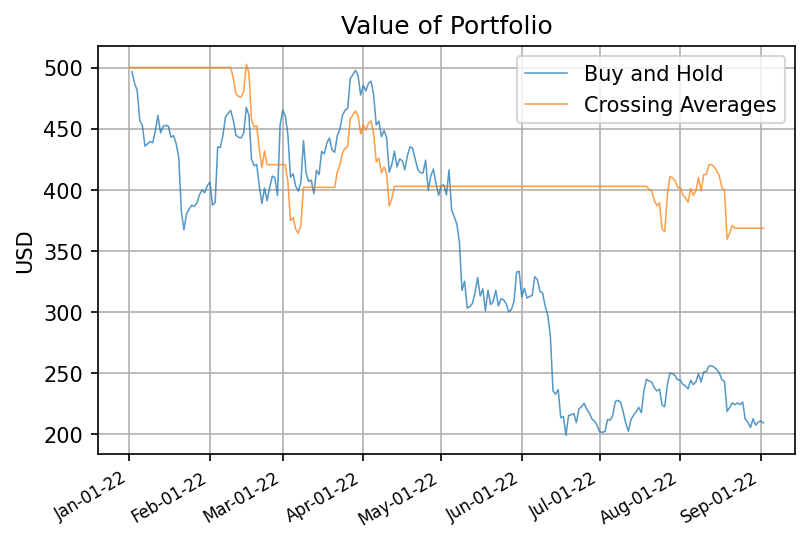

In [86]:
fig, ax = plt.subplots(dpi=150)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [89]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=backtest.index, y=initial_balance*backtest.BTC_Return.cumprod(),
                    mode='lines',
                    name='Buy and Hold',
                    line=dict(color='royalblue')
                 ))
fig.add_trace(go.Scatter(x=backtest.index, y=backtest['Balance'],
                    mode='lines',
                    name='Crossing Average'
                 ))


# Edit the layout
fig.update_layout(title='Value of Portfolio',
                   xaxis_title='Date',
                   yaxis_title='USD')

fig.show()